<a href="https://colab.research.google.com/github/Sahanaka/auto-encoders/blob/main/Simple_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple AutoEncoder**

In this lab, we will build a simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

## **Imports**

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## **Prepare & Preview Data**

We will prepare the simple 3d dataset

In [8]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

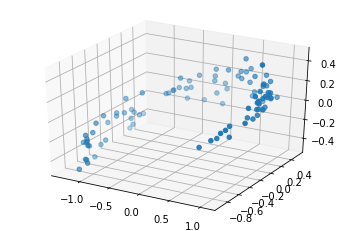

In [9]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## **Model**

**The AutoEncoder comprises of an Encoder and a Decoder. Decoder neurons should be equal to the input neurons. In this case the Encoder reduces the dimensionality to 2d and the Decoder reconstructs the data points back to 3d. Some of the features may get lost but majority will prevail.**

In [10]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

auto_encoder = keras.models.Sequential([encoder, decoder])

### Compile the Model

In [11]:
auto_encoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

### Train the model
**NOTE: We provide X_train as the y parameter because the input and the output should be the same>**

In [12]:
history = auto_encoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.0930
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0839
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0722
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0598
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

## **Plots**

### Encoder Output

In [14]:
encodings = encoder.predict(X_train)

# Samples
print(f'input point: {X_train[0]}')
print(f'encoded point: {encodings[0]}')

input point: [-1.11922186 -0.8067075  -0.40805528]
encoded point: [-0.87993914 -1.1268369 ]


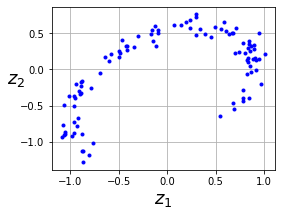

In [16]:
# Plots
fig = plt.figure(figsize=(4,3))
plt.plot(encodings[:,0], encodings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

### Decoder Output

In [18]:
# Decode the encoder output
decodings = decoder.predict(encodings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {encodings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-1.11922186 -0.8067075  -0.40805528]
encoded point: [-0.87993914 -1.1268369 ]
decoded point: [-1.1398739  -0.82391137 -0.38162   ]


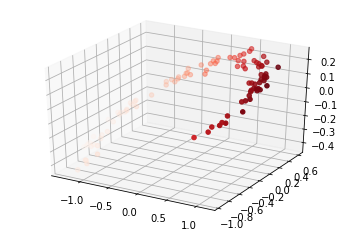

In [19]:
# Plots
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');